In [1]:
# default_exp evolution

# Taste Evolution Visualisation

<br>

### Imports

In [106]:
#exports
import numpy as np
import pandas as pd

import datetime
from moepy import lowess, eda
from ipypb import track

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df_dw = pd.read_csv('../data/playlists/discover_weekly.csv')

df_dw.head()

,date_added_to_playlist,album_art_url,album_art_height,album_art_width,album_uri,album_name,release_date,artist_names,artist_uris,isrc,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,time_signature
0,2020-12-28T00:00:00Z,https://i.scdn.co/image/ab67616d0000b2731702d8...,640.0,640.0,spotify:album:5wxOkqHT4xGadN56TAzF09,Colossal Youth,1980,Young Marble Giants,spotify:artist:0tQ2Q4y9iUkKszxXyB14ZH,GBCEL0700250,...,1,-14.719,0.2130,0.944,0.810000,0.0840,0.364,166.169,1,4
1,2020-12-28T00:00:00Z,https://i.scdn.co/image/ab67616d0000b273ef277a...,640.0,640.0,spotify:album:7KQ7mXqZTuMRvQKeM3WTAw,Fargo Year 2 (Songs from the Original MGM / FX...,2016-03-25,White Denim,spotify:artist:0RdRumkn2UydUjqytNJ2Cp,USQX91600261,...,2,-8.520,0.0327,0.195,0.000198,0.1230,0.798,121.159,1,4
2,2020-12-28T00:00:00Z,https://i.scdn.co/image/ab67616d0000b27310067a...,640.0,640.0,spotify:album:2jAxcrtHoGo7SNS0r27TKk,Love is All I Bring,2019-10-25,Althea And Donna,spotify:artist:5E8FbSTegbOlYAH4b2rZj2,GBAJE7700163,...,7,-8.634,0.1620,0.164,0.000000,0.0458,0.925,80.766,1,4
3,2020-12-28T00:00:00Z,https://i.scdn.co/image/ab67616d0000b27333c6f2...,640.0,640.0,spotify:album:3Il1CWXA64e8gukuJZoj0e,One Two,2002-03-15,Sister Nancy,spotify:artist:21pMSs2JHWwwy2kp1QIIVB,USA2P0804886,...,9,-6.813,0.2870,0.673,0.000002,0.3640,0.873,77.950,0,4
4,2020-12-28T00:00:00Z,https://i.scdn.co/image/ab67616d0000b273bc80ca...,640.0,640.0,spotify:album:63FlYaIy0oT8gYdCxBqBNe,Pickled Eggs and Sherbet,1999-01-01,The All Seeing I,spotify:artist:0A0yu52zNGKe2rtr9wHfkD,GBANR9900075,...,10,-9.136,0.0790,0.184,0.474000,0.1310,0.691,154.862,1,4


In [61]:
is_dt_dtype = lambda potential_dt: isinstance(potential_dt, datetime.datetime) or isinstance(potential_dt, pd.Timestamp)

def fit_lowess(s_x, s_y, x_pred=None, x_dt_type=None, **lowess_kwargs):
    if x_dt_type is None:
        x_dt_type = is_dt_dtype(s_x[0])
        
    if x_dt_type == True:
        s_x = s_x.astype(int)
        
    x = s_x.values
    y = s_y.values

    lowess_model = lowess.Lowess()
    lowess_model.fit(x, y, **lowess_kwargs)

    if x_pred is None:
        x_pred = np.linspace(x.min(), x.max(), 100)
        
    y_pred = lowess_model.predict(x_pred)
    
    if x_dt_type == True:
        x_pred = pd.to_datetime(x_pred)
        
    return x_pred, y_pred

In [103]:
def smoothed_plot(df_dw, added_dts, numeric_col, ax=None):
    # Smoothing
    s_x = added_dts
    s_y = df_dw[numeric_col]

    x_pred, y_pred = fit_lowess(s_x, s_y, frac=0.25, num_fits=100)

    jitter_scale = 5e13
    s_x_jittered = pd.to_datetime(s_x.astype(int) + np.random.normal(0, jitter_scale, s_x.size))

    # Plotting
    if ax is None:
        fig, ax = plt.subplots(dpi=150)

    ax.scatter(s_x_jittered, s_y, s=0.5, color='k')
    ax.plot(x_pred, y_pred, color='r')

    dt_fmt = mdates.DateFormatter('%d %b')
    ax.xaxis.set_major_formatter(dt_fmt)
    eda.hide_spines(ax)
    ax.set_ylabel(numeric_col.title())

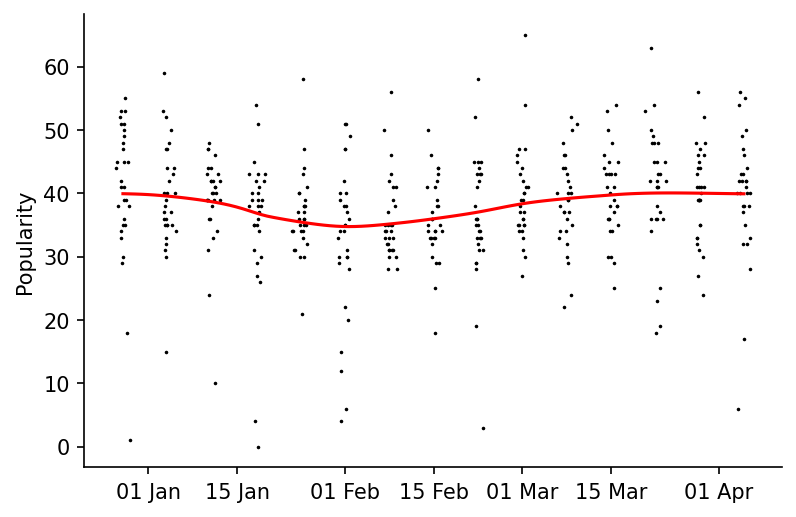

In [104]:
numeric_col = 'popularity'

smoothed_plot(df_dw, added_dts, numeric_col)

In [108]:
numeric_cols = ['popularity', 'danceability', 'energy', 'key', 
                'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 
                'tempo', 'mode', 'time_signature']

